# PyTorch Workflow

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#check the PyTorch version
torch.__version__

'2.1.2+cu121'

## Preparing the data

In [2]:
#create the known parameters
weight = 0.7 #m
bias = 0.3 #c

#creating the data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step)
y = weight * X + bias

X[10:],  y[10:]

(tensor([0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400, 0.3600,
         0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200, 0.5400,
         0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000, 0.7200,
         0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000,
         0.9200, 0.9400, 0.9600, 0.9800]),
 tensor([0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380, 0.5520,
         0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640, 0.6780,
         0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900, 0.8040,
         0.8180, 0.8320, 0.8460, 0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300,
         0.9440, 0.9580, 0.9720, 0.9860]))

In [3]:
#split the data into training and data
train = int(0.8 * len(X))
X_train, y_train = X[:train], y[:train]
X_test, y_test = X[train:], y[train:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [4]:
def plot_predictions(train_data = X_train,
                    train_label = y_train,
                    test_data = X_test,
                    test_label = y_test,
                    predictions = None):
    """ Plot training data, test data and compare predictions """

    plt.figure(figsize = (10,7))
    #plotting training data in blue
    plt.scatter(train_data, train_label, c='b', s=4, label = 'Training Data')
    #plotting test data in green
    plt.scatter(test_data, test_label, c='g', s=4, label = 'Test Data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label = 'Predictions')

    #Show the legend
    plt.legend(prop={"size": 14});

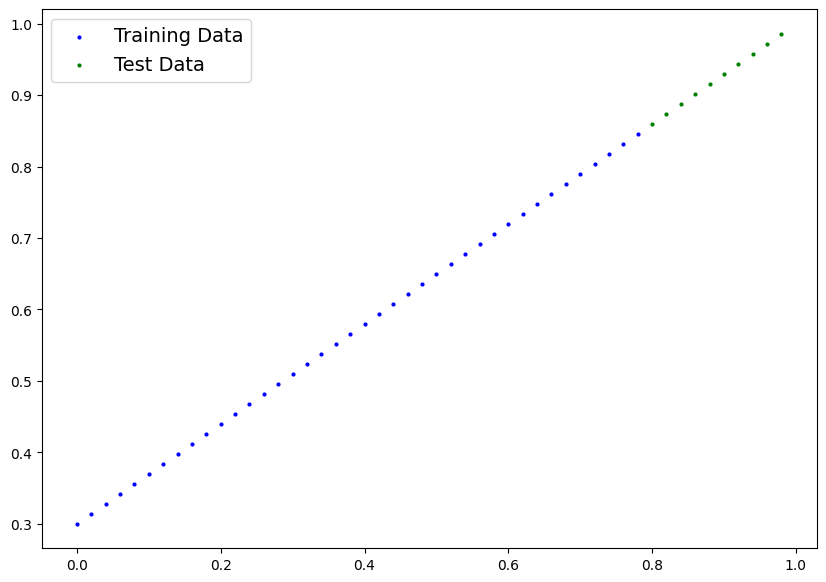

In [5]:
plot_predictions();

## Building the model

### What our model does:
* Start with random values (weight & bias)
* Look at the training data and find pattern in the data and adjust the random value to better represent(or get closer to) the ideal values (weight and bias that we used to create the data)

### How to do so?

Through main algorithms:
1. Gradient descent
2. Backpropagation

In [6]:
#create a linear regression model class (y = mx+c)
class LinearRegressionModel(nn.Module): # <- almost everything in Pytorch inherits from nn.module
    def __init__(self): #defining constructor
        super().__init__()
        #creating weight
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad = True, #by default its true,
                                               dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                               requires_grad = True, #by default its true,
                                               dtype = torch.float))
        #Use forward method to define computation in model
    def forward(self, x:torch.Tensor) -> torch.Tensor: #using the x as an input
        return self.weights * x + self.bias #linear regression formula
        
        

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (neural network can be consicdered as a computational graph)
* torch.nn.Parameters - defines what parameters our model should try to learn or update, often a PyTorch layer from torch.nn will set this for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overwrite forward ()
* torch.optim - this is where all the optimizers in PyTorch lives, they will help with the gradiant descent
* def forward() - all nn.Module subclasses require you to overwrite forward function to define the main computation of the model.

In [7]:
torch.manual_seed(42)

#create an instance of the model
model = LinearRegressionModel()

#check out the parameters
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

Let's see how well the model predicts `y_test` based on `X_test`

In [9]:
X_test

tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
        0.9800])

In [10]:
#make predictions with model
with torch.inference_mode(): #inference mode turn off that gradient tracking, which makes inference faster
    y_preds = model(X_test)
y_preds

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

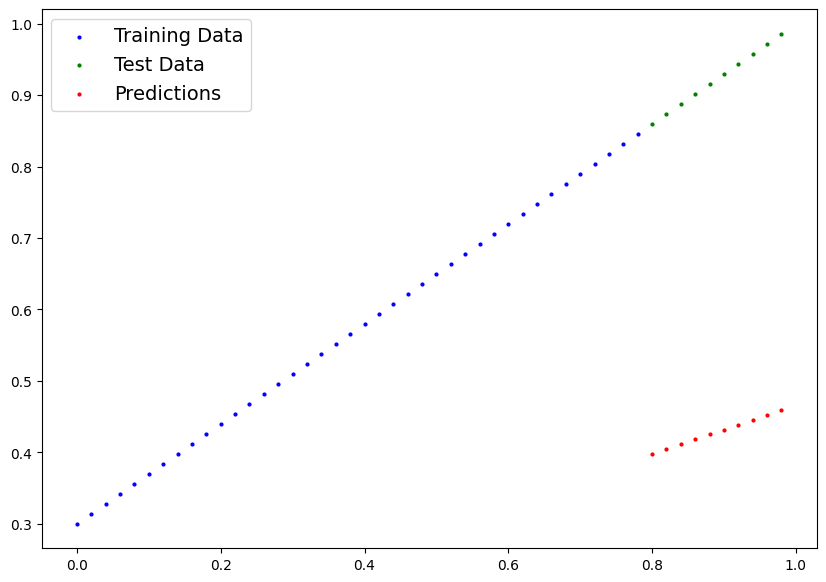

In [12]:
plot_predictions(predictions = y_preds) #without training

## Fitting the model to the data(Training)

## Making predictions and evaluating the model

## Saving and loading the model